In [1]:
from PyFunctions.ReaderFromGeant import ReadAndBlur
from PyFunctions.ADConverter import GetDerivative, GetCorrection
from PyFunctions.Analysis import GetLinearSmoothing, GetAprHist, ErrorSquare, GetMainPeak, Convert_To_Energy, FindOptimalSolution
from PyFunctions.Plotting import plotSimpleHist, plotAnalisis

MyHist = []
MyDHist = []

Rare data here

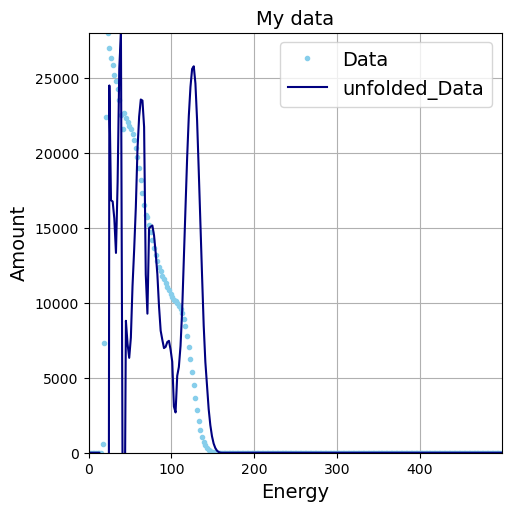

In [2]:
str = 'data/detector_data.txt' # read file   

MyHist = ReadAndBlur(str)
MyDHist = GetDerivative(MyHist)
plotSimpleHist(Hist = MyHist, DHist = MyDHist, Graph_Name = 'My data')

To make calibration

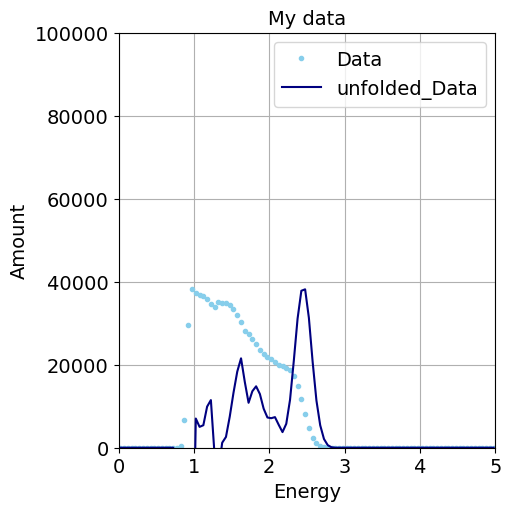

In [3]:
MyHist = Convert_To_Energy(MyHist)
Hist = GetCorrection(MyHist)
MyDHist = GetDerivative(MyHist)

Axes = [[0, 5], [0, 10e4]]
plotSimpleHist(Hist = MyHist, DHist = MyDHist, MyAxes= Axes, Graph_Name = 'My data')

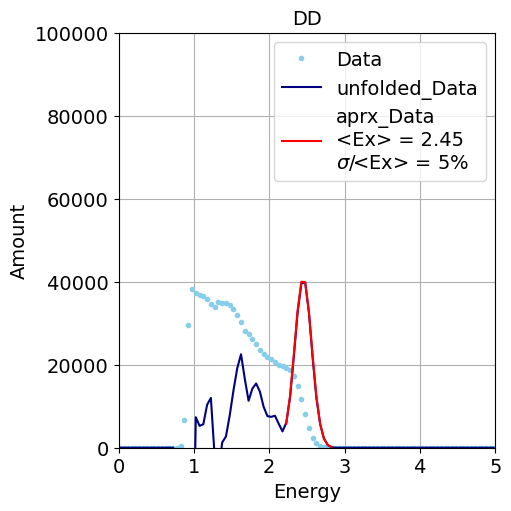

In [4]:


EnergyOfPeak = [2.15, 3] #bord [keV] where should be a Main Peak 
Peak = GetMainPeak(MyDHist, EnergyOfPeak, GetDerivative)

if(len(Peak[0]) > 1):#if it exists
    solution = FindOptimalSolution(Peak, ErrorSquare)
    Aprox = GetAprHist(Peak, solution)

    #customization of graph
    Axes = [[0, 5], [0, 1e5]] #[X_axis, Y_axis]
    plotAnalisis(Hist = MyHist, DHist = MyDHist, AprxHist = Aprox, vecSolution= solution, Graph_Name='DD', MyAxes=Axes, modSave = 0)
